In [2]:
#import torch
#import torch.nn as nn
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [7]:
G1 = 0.0
F2 = 0.0
F1 = np.linspace(0.001,0.01,10)
G2 = np.linspace(0.001,0.01,10)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 ])

In [4]:
G1 = 0.0
F2 = 0.0
F1 = np.linspace(0.001,0.01,10)
G2 = np.linspace(0.001,0.01,10)
input_gamma1 = np.linspace(0.0,0.02,21)
measured_gamma1 = np.zeros((len(input_gamma1),len(F1),len(G2)),dtype=np.float64)
gamma1_bias = np.zeros_like(measured_gamma1)
additive_bias = np.zeros((len(F1),len(G2)),dtype=np.float64)
multiplicative_bias = np.zeros((len(F1),len(G2)),dtype=np.float64)
for i in range(len(input_gamma1)):
    measured_gamma1[i][:][:] = fits.getdata(f'data/Fix_F1G2/gamma1_measured_flexion_F1G2_{input_gamma1[i]:.3f}.fits')
    gamma1_bias[i][:][:] = measured_gamma1[i][:][:] - input_gamma1[i]

### use linear fit to get additive bias
for i in range(len(F1)):
    for j in range(len(G2)):
        model = np.poly1d(np.polyfit(input_gamma1, gamma1_bias[:,i,j], 1))
        additive_bias[i,j] = model[0]
        multiplicative_bias[i,j] = model[1]

In [122]:
multiplicative_bias

array([[-9.83805543e-05, -9.79284815e-05, -9.71752521e-05,
        -9.61209066e-05, -9.47654245e-05, -9.31085873e-05,
        -9.11504678e-05, -8.88910903e-05, -8.63307812e-05,
        -8.34693330e-05],
       [-8.85103912e-05, -8.80584904e-05, -8.73053445e-05,
        -8.62507224e-05, -8.48949273e-05, -8.32380400e-05,
        -8.12800153e-05, -7.90210107e-05, -7.64606622e-05,
        -7.35986545e-05],
       [-7.20603508e-05, -7.16081833e-05, -7.08549206e-05,
        -6.98006125e-05, -6.84449122e-05, -6.67880495e-05,
        -6.48296631e-05, -6.25703118e-05, -6.00097297e-05,
        -5.71481247e-05],
       [-4.90293043e-05, -4.85773568e-05, -4.78240163e-05,
        -4.67693191e-05, -4.54133736e-05, -4.37564750e-05,
        -4.17982925e-05, -3.95389367e-05, -3.69783337e-05,
        -3.41164889e-05],
       [-1.94152624e-05, -1.89630091e-05, -1.82096520e-05,
        -1.71549984e-05, -1.57991669e-05, -1.41420810e-05,
        -1.21836731e-05, -9.92391173e-06, -7.36301057e-06,
        -4.

In [123]:
bias = multiplicative_bias ## could be anything 
print(bias)

[[-9.83805543e-05 -9.79284815e-05 -9.71752521e-05 -9.61209066e-05
  -9.47654245e-05 -9.31085873e-05 -9.11504678e-05 -8.88910903e-05
  -8.63307812e-05 -8.34693330e-05]
 [-8.85103912e-05 -8.80584904e-05 -8.73053445e-05 -8.62507224e-05
  -8.48949273e-05 -8.32380400e-05 -8.12800153e-05 -7.90210107e-05
  -7.64606622e-05 -7.35986545e-05]
 [-7.20603508e-05 -7.16081833e-05 -7.08549206e-05 -6.98006125e-05
  -6.84449122e-05 -6.67880495e-05 -6.48296631e-05 -6.25703118e-05
  -6.00097297e-05 -5.71481247e-05]
 [-4.90293043e-05 -4.85773568e-05 -4.78240163e-05 -4.67693191e-05
  -4.54133736e-05 -4.37564750e-05 -4.17982925e-05 -3.95389367e-05
  -3.69783337e-05 -3.41164889e-05]
 [-1.94152624e-05 -1.89630091e-05 -1.82096520e-05 -1.71549984e-05
  -1.57991669e-05 -1.41420810e-05 -1.21836731e-05 -9.92391173e-06
  -7.36301057e-06 -4.50106348e-06]
 [ 1.67830937e-05  1.72349383e-05  1.79884175e-05  1.90431694e-05
   2.03992720e-05  2.20566474e-05  2.40151404e-05  2.62751063e-05
   2.88361813e-05  3.16985561e-05

In [131]:
f1,g2 = np.meshgrid(F1,G2)
def func_F1G2(F1G2,a,b):
    F1,G2 = F1G2
    return a * F1 * G2 + b
def func_G2(F1G2,a,b):
    F1,G2 = F1G2
    return a * G2 + b
def func_G2_G22(F1G2,a,b,c):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + c

def func_G2_G22_F1_F11(F1G2,a,b,c,d,e,f):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + c*F1 + d*F1*F1 + e * G2* F1 + f
        
        
def func_G22_F11(F1G2,b,d,e,f):
    F1,G2 = F1G2
    return b*G2**2 + d*F1*F1 + e * G2* F1 + f


def func_G2_G22_x(F1G2,a,b,e,f):
    F1,G2 = F1G2
    return a * G2 + b*G2**2 + e * G2* F1 + f
F1G2 = np.vstack([f1.ravel(), g2.ravel()])
Bias = bias.ravel()



Fits with $a\times G2 + b$ and $a \times F1\times G2 + b$ does not provide good fits to $\gamma_1 - \gamma_{1,mea}$
I reached pretty small sum square value with $a*G2 + b*G2^2 + c$. You need all terms in second order to reach the minimum of sum square error...

If we are just looking for the additive bias, I think $a * G2 + b * G2^2 + e * G2 F1 + f$ is already a good fit (almost exhaust the minimization). 
For the multiplicative bias, you also need all the terms to get a good fit. 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


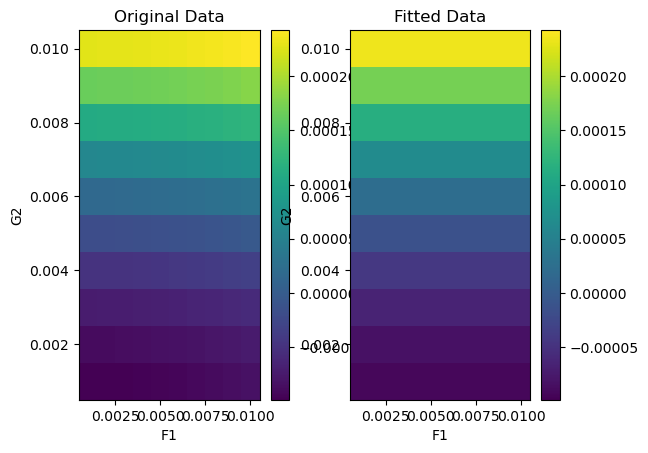

2.385886445577878e-09


In [133]:
popt, _ = curve_fit(func_G2_G22, F1G2, Bias)
a,b,c = popt
Bias_fit = a * g2 + b * g2* g2 + c

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


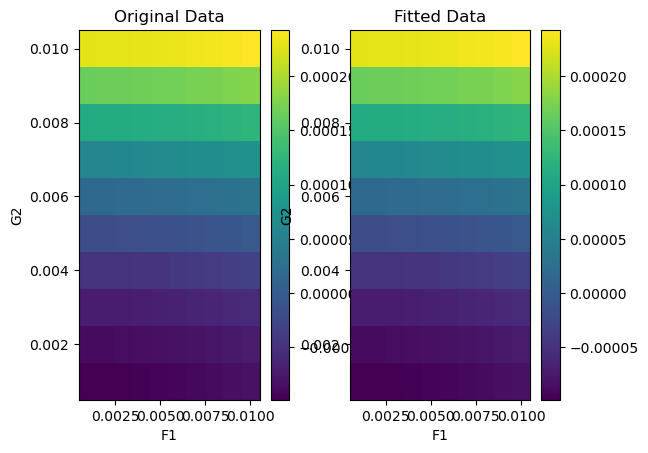

4.4607562788973124e-13


In [134]:
popt, _ = curve_fit(func_G2_G22, F1G2, Bias)
a,b,c = popt
Bias_fit = + b*g2**2  + d*f1*f1 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


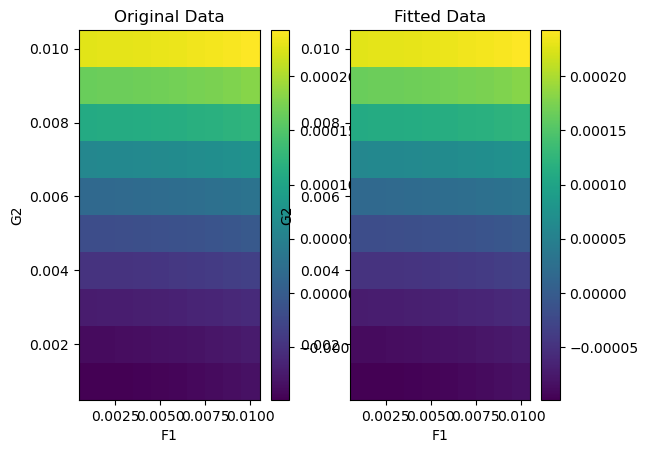

2.7865353537068406e-15


In [135]:
popt, _ = curve_fit(func_G2_G22_F1_F11, F1G2, Bias)

a,b,c,d,e,f = popt
Bias_fit = a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


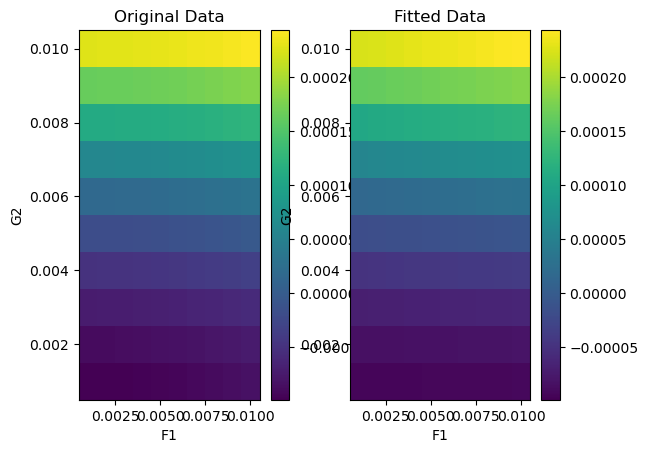

6.049161340835618e-10


In [129]:
popt, _ = curve_fit(func_G2_G22_x, F1G2, Bias)
a,b,e,f = popt
Bias_fit = a * g2 + b*g2**2 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


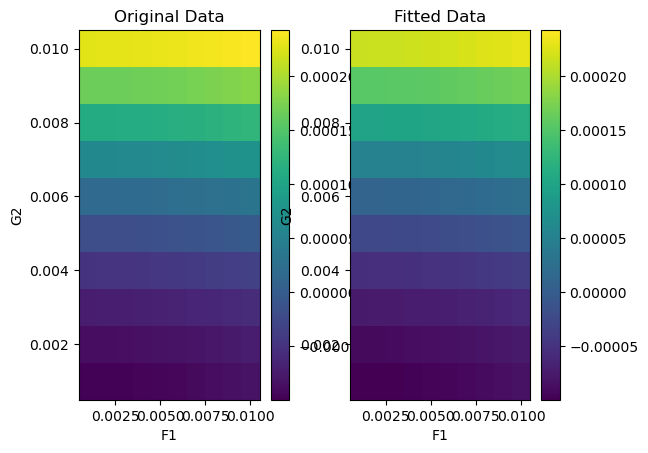

6.702274992917356e-09


In [132]:
popt, _ = curve_fit(func_G22_F11, F1G2, Bias)

b,d,e,f = popt
Bias_fit = a * g2 + b*g2**2 + c*f1 + d*f1*f1 + e*g2*f1 + f

vmin = min(bias.min(), Bias_fit.min())
vmax = max(bias.max(), Bias_fit.max())
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.pcolormesh(f1, g2, bias, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Fitted Data")
plt.pcolormesh(f1, g2, Bias_fit, shading='auto', vmin=vmin,vmax=vmax)
plt.xlabel("F1")
plt.ylabel("G2")
plt.colorbar()


plt.show()
print(np.sum((Bias_fit-bias)**2))